In [1]:
import pandas as pd

In [2]:
cd Data_1

C:\Users\emre-\Data_1


In [3]:
cd clarusway-data-science-5-20-master

C:\Users\emre-\Data_1\clarusway-data-science-5-20-master


In [4]:
cd 1-projects/

C:\Users\emre-\Data_1\clarusway-data-science-5-20-master\1-projects


In [5]:
cd 01-EU_DS_DAPy_M1-(TrafficPoliceStops)

C:\Users\emre-\Data_1\clarusway-data-science-5-20-master\1-projects\01-EU_DS_DAPy_M1-(TrafficPoliceStops)


In [6]:
import numpy as np
import pandas as pd

In [7]:
ri = pd.read_csv("ri.csv",low_memory=False, index_col = "DatetimeIndex")

In [8]:
ri["is_arrested"].mean()

0.03454755048024903

In [9]:
ri.index = ri.index.astype("datetime64[ns]")

In [10]:
ri.index.hour

Int64Index([ 1, 20, 12,  1,  8,  8, 17, 23, 20,  3,
            ...
            22, 22, 22, 22, 22, 22, 22, 23, 23, 23],
           dtype='int64', name='DatetimeIndex', length=480584)

In [11]:
ri["is_arrested"].groupby(ri.index.hour).mean()

DatetimeIndex
0     0.052151
1     0.067127
2     0.061067
3     0.052613
4     0.053897
5     0.032657
6     0.012949
7     0.013829
8     0.019717
9     0.024699
10    0.025583
11    0.027078
12    0.031361
13    0.030250
14    0.031531
15    0.032125
16    0.033519
17    0.038989
18    0.039902
19    0.031366
20    0.039292
21    0.059956
22    0.043980
23    0.045087
Name: is_arrested, dtype: float64

In [12]:
hourly_arrest_rate = ri["is_arrested"].groupby(ri.index.hour).mean()

In [13]:
import matplotlib.pyplot as plt

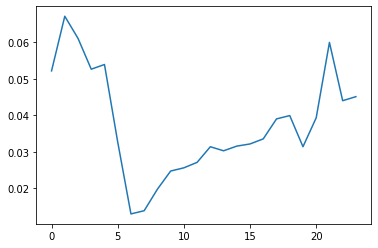

In [14]:
plt.plot(hourly_arrest_rate);

Text(0.5, 1.0, 'Arrest Rate by Time of Day')

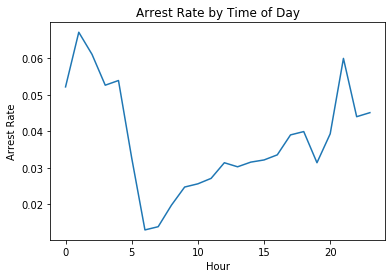

In [15]:
plt.plot(hourly_arrest_rate)
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")

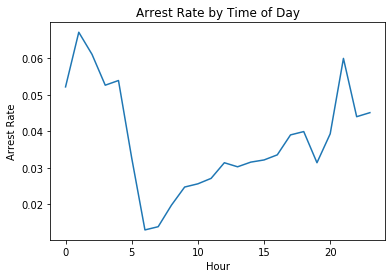

In [16]:
plt.plot(hourly_arrest_rate)
plt.xlabel("Hour")
plt.ylabel("Arrest Rate")
plt.title("Arrest Rate by Time of Day")
plt.show()

In [17]:
 ri["drugs_related_stop"].resample("A").mean()

DatetimeIndex
2005-12-31    0.008038
2006-12-31    0.006624
2007-12-31    0.008437
2008-12-31    0.007549
2009-12-31    0.010447
2010-12-31    0.010142
2011-12-31    0.011400
2012-12-31    0.010343
2013-12-31    0.011879
2014-12-31    0.013176
2015-12-31    0.010598
Freq: A-DEC, Name: drugs_related_stop, dtype: float64

In [18]:
annual_drug_rate =  ri["drugs_related_stop"].resample("A").mean()

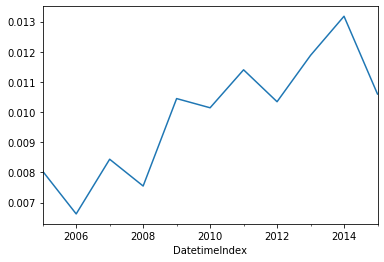

In [19]:
annual_drug_rate.plot()
plt.show()

In [20]:
annual_search_rate= ri["search_conducted"].resample("A").mean()

In [21]:
annual = pd.concat([annual_search_rate, annual_drug_rate], axis=1)

In [22]:
annual

,search_conducted,drugs_related_stop
DatetimeIndex,,
2005-12-31,0.050692,0.008038
2006-12-31,0.037748,0.006624
2007-12-31,0.041844,0.008437
2008-12-31,0.039544,0.007549
2009-12-31,0.049849,0.010447
2010-12-31,0.042089,0.010142
2011-12-31,0.037767,0.011400
2012-12-31,0.032278,0.010343
2013-12-31,0.029054,0.011879


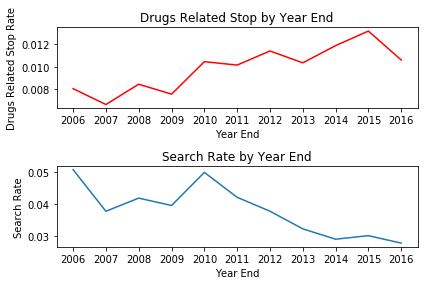

In [23]:
plt.subplot(2,1,1)
plt.plot(annual["drugs_related_stop"],"r")
plt.xlabel("Year End")
plt.ylabel("Drugs Related Stop Rate")
plt.title("Drugs Related Stop by Year End")
plt.subplot(2,1,2)
plt.plot(annual["search_conducted"])
plt.xlabel("Year End")
plt.ylabel("Search Rate")
plt.title("Search Rate by Year End")
plt.tight_layout()

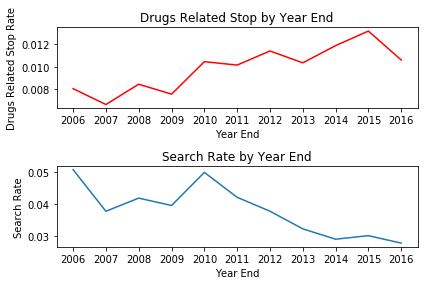

In [24]:
plt.subplot(2,1,1)
plt.plot(annual["drugs_related_stop"],"r")
plt.xlabel("Year End")
plt.ylabel("Drugs Related Stop Rate")
plt.title("Drugs Related Stop by Year End")
plt.subplot(2,1,2)
plt.plot(annual["search_conducted"])
plt.xlabel("Year End")
plt.ylabel("Search Rate")
plt.title("Search Rate by Year End")
plt.tight_layout()
plt.show()

In [25]:
pd.crosstab(index=ri["district"], columns= ri["violation"])

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234
Zone X1,1725,3711,752,192,451,6393
Zone X3,11520,17178,4069,3532,4445,48687
Zone X4,19975,29554,8865,7551,4870,54855


In [26]:
all_zones = pd.crosstab(index=ri["district"], columns= ri["violation"])

In [27]:
all_zones.loc['Zone K1':'Zone K3']

violation,Equipment,Moving violation,Other,Registration/plates,Seat belt,Speeding
district,,,,,,
Zone K1,3786,7127,1501,628,1,33067
Zone K2,11285,16440,5103,4056,2897,57500
Zone K3,12959,16218,3926,3871,3660,68234


In [28]:
k_zones = all_zones.loc['Zone K1':'Zone K3']

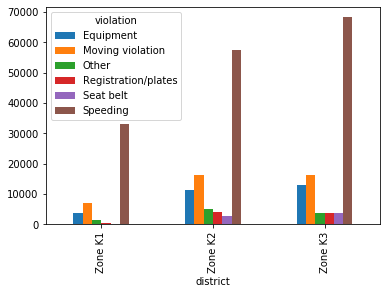

In [29]:
k_zones.plot(kind = "bar");

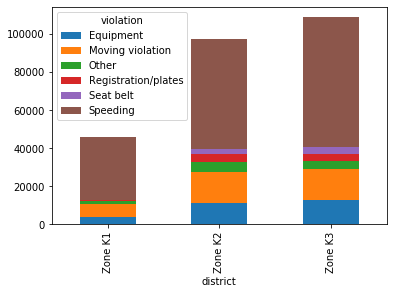

In [30]:
k_zones.plot(kind = "bar" ,stacked = True)
plt.tight_layout;

In [31]:
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min', '2', '1'], dtype=object)

In [32]:
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}

In [33]:
ri.stop_duration.unique()

array(['0-15 Min', '16-30 Min', '30+ Min', '2', '1'], dtype=object)

In [34]:
ri["stop_minutes"] = ri["stop_duration"].map(mapping)

In [35]:
ri["stop_minutes"].unique()

array([ 8., 23., 45., nan])

In [36]:
ri.groupby("violation_raw").stop_minutes.mean()

violation_raw
APB                                 18.593814
Call for Service                    21.963314
Equipment/Inspection Violation      11.454326
Motorist Assist/Courtesy            17.629929
Other Traffic Violation             13.834359
Registration Violation              13.543268
Seatbelt Violation                   9.698236
Special Detail/Directed Patrol      14.876778
Speeding                            10.589215
Suspicious Person                   18.374269
Violation of City/Town Ordinance    13.230695
Warrant                             19.769231
Name: stop_minutes, dtype: float64

In [37]:
stop_length = ri["stop_minutes"].groupby(ri["violation_raw"]).mean()

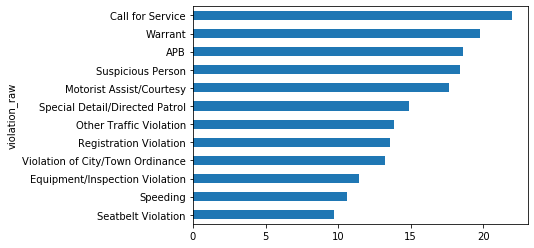

In [38]:
stop_length.sort_values().plot(kind = "barh");

In [39]:
weather = pd.read_csv("weather.csv", low_memory = False)

In [40]:
weather[["TMIN", "TAVG", "TMAX"]].describe()

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


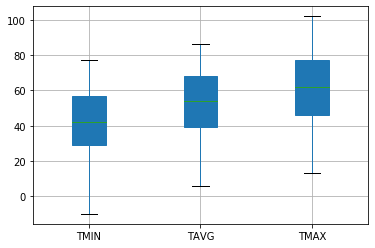

In [41]:
weather[["TMIN", "TAVG", "TMAX"]].boxplot(patch_artist=True);
plt.show()

In [42]:
weather["TDIFF"] = weather["TMAX"] - weather["TMIN"]

In [43]:
weather["TDIFF"].describe()

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

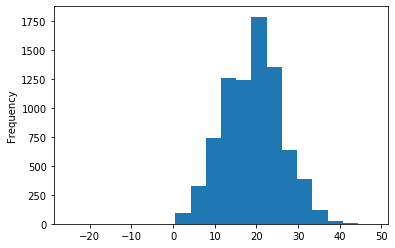

In [44]:
weather["TDIFF"].plot(kind="hist", bins=20)
plt.show()

In [45]:
WT = weather.loc[:, 'WT01' : 'WT22']

In [46]:
weather['bad_conditions'] = WT.sum(axis='columns')

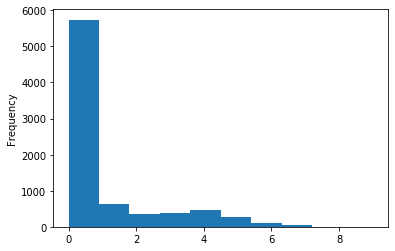

In [47]:
weather['bad_conditions'].plot(kind='hist')
plt.show()

In [48]:
weather["bad_conditions"].value_counts().sort_index()

0.0    5738
1.0     628
2.0     368
3.0     380
4.0     476
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

In [49]:
mapping = {0:'good', 1:'bad', 2:'bad', 3:'bad', 4:'bad', 5:'worse', 6:'worse', 7:'worse', 8:'worse', 9:'worse'}

In [50]:
weather["rating"] = weather["bad_conditions"].map(mapping)

In [51]:
weather["rating"].unique()

array(['good', 'bad', 'worse'], dtype=object)

In [52]:
cats = ["good", "bad", "worse"]

In [53]:
weather['rating'] = weather["rating"].astype('category')

In [54]:
w_cat = weather["rating"].cat.set_categories(cats)

In [55]:
w_cat.head()

0    good
1    good
2    good
3    good
4    good
Name: rating, dtype: category
Categories (3, object): [good, bad, worse]

In [56]:
ri.reset_index(inplace=True)

In [57]:
ri.head()

,DatetimeIndex,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,frisk,stop_minutes
0,2005-01-02 01:55:00,RI-2005-00001,2005-01-02,01:55,Zone K1,NaN,NaN,600,M,1985.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K1,False,8.0
1,2005-01-02 20:30:00,RI-2005-00002,2005-01-02,20:30,Zone X4,NaN,NaN,500,M,1987.0,...,NaN,False,Citation,False,16-30 Min,False,False,Zone X4,False,23.0
2,2005-01-04 12:55:00,RI-2005-00004,2005-01-04,12:55,Zone X4,NaN,NaN,500,M,1986.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False,8.0
3,2005-01-06 01:30:00,RI-2005-00005,2005-01-06,01:30,Zone X4,NaN,NaN,500,M,1978.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,False,8.0
4,2005-01-12 08:05:00,RI-2005-00006,2005-01-12,08:05,Zone X1,NaN,NaN,000,M,1973.0,...,NaN,False,Citation,False,30+ Min,True,False,Zone X1,False,45.0


In [58]:
weather_rating = weather[['DATE', 'rating']]

In [59]:
weather_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


In [63]:
weather_rating.shape

(8022, 2)

In [64]:
weather_rating.DATE.nunique()

4017

In [65]:
ri.stop_date[3]

'2005-01-06'

In [66]:
ri.shape  

(480584, 27)

In [67]:
ri_weather = pd.merge(left=ri, right=weather_rating, left_on='stop_date', right_on='DATE', how='left')

In [68]:
ri_weather.shape

(959952, 29)

In [70]:
weather_rating.head()

,DATE,rating
0,2005-01-01,good
1,2005-01-02,good
2,2005-01-03,good
3,2005-01-04,good
4,2005-01-05,good


In [71]:
ri_weather.is_arrested.mean()

0.0345715202426788

In [72]:
ri_weather.groupby("rating") .is_arrested.mean()

rating
bad      0.035226
good     0.034080
worse    0.039360
Name: is_arrested, dtype: float64

In [73]:
ri_weather.groupby(["violation", "rating"]).is_arrested.mean()

violation            rating
Equipment            bad       0.059581
                     good      0.059125
                     worse     0.094373
Moving violation     bad       0.058081
                     good      0.056805
                     worse     0.062249
Other                bad       0.084950
                     good      0.080682
                     worse     0.058704
Registration/plates  bad       0.092634
                     good      0.083238
                     worse     0.098673
Seat belt            bad       0.028795
                     good      0.026339
                     worse     0.000000
Speeding             bad       0.013348
                     good      0.013494
                     worse     0.016600
Name: is_arrested, dtype: float64

In [74]:
arrest_rate = ri_weather.groupby(["violation", "rating"]).is_arrested.mean()

In [75]:
arrest_rate

violation            rating
Equipment            bad       0.059581
                     good      0.059125
                     worse     0.094373
Moving violation     bad       0.058081
                     good      0.056805
                     worse     0.062249
Other                bad       0.084950
                     good      0.080682
                     worse     0.058704
Registration/plates  bad       0.092634
                     good      0.083238
                     worse     0.098673
Seat belt            bad       0.028795
                     good      0.026339
                     worse     0.000000
Speeding             bad       0.013348
                     good      0.013494
                     worse     0.016600
Name: is_arrested, dtype: float64

In [76]:
arrest_rate.loc["Moving violation", "bad"]

0.0580814717477004

In [78]:
arrest_rate.loc["Speeding"]

rating
bad      0.013348
good     0.013494
worse    0.016600
Name: is_arrested, dtype: float64

In [79]:
arrest_rate

violation            rating
Equipment            bad       0.059581
                     good      0.059125
                     worse     0.094373
Moving violation     bad       0.058081
                     good      0.056805
                     worse     0.062249
Other                bad       0.084950
                     good      0.080682
                     worse     0.058704
Registration/plates  bad       0.092634
                     good      0.083238
                     worse     0.098673
Seat belt            bad       0.028795
                     good      0.026339
                     worse     0.000000
Speeding             bad       0.013348
                     good      0.013494
                     worse     0.016600
Name: is_arrested, dtype: float64

In [80]:
arrest_rate.unstack()

rating,bad,good,worse
violation,,,
Equipment,0.059581,0.059125,0.094373
Moving violation,0.058081,0.056805,0.062249
Other,0.084950,0.080682,0.058704
Registration/plates,0.092634,0.083238,0.098673
Seat belt,0.028795,0.026339,0.000000
Speeding,0.013348,0.013494,0.016600


In [81]:
ri_weather.pivot_table(index = "violation", columns = "rating", values= "is_arrested")

rating,bad,good,worse
violation,,,
Equipment,0.059581,0.059125,0.094373
Moving violation,0.058081,0.056805,0.062249
Other,0.084950,0.080682,0.058704
Registration/plates,0.092634,0.083238,0.098673
Seat belt,0.028795,0.026339,0.000000
Speeding,0.013348,0.013494,0.016600
